In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Introduction to neural network classification with TensorFlow

## Creating data to view and fit

In [3]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Let's visualize our data!

In [6]:
circles = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


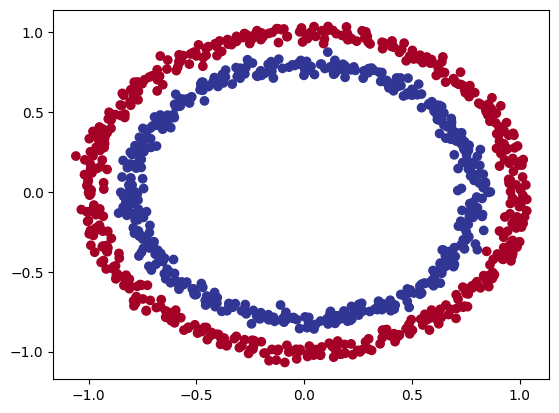

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [8]:
X.shape, y.shape

((1000, 2), (1000,))

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(2)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100, verbose=1)

model.evaluate(X_test, y_test)

Epoch 1/100
25/25 [==============================] - 7s 5ms/step - loss: 3.5934 - accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 2.4956 - accuracy: 0.5150
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 2.2083 - accuracy: 0.5163
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 1.9716 - accuracy: 0.5225
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1.8925 - accuracy: 0.5200
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 1.7972 - accuracy: 0.5188
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 1.6408 - accuracy: 0.5175
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 1.1279 - accuracy: 0.5188
Epoch 9/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7611 - accuracy: 0.5125
Epoch 10/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7524 - accuracy: 0.5125
Epoch 11/

[0.696183979511261, 0.46000000834465027]

In [12]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 3s 5ms/step - loss: 5.5996 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 5.5911 - accuracy: 0.4810
Epoch 3/5
32/32 [==============================] - 0s 6ms/step - loss: 5.5666 - accuracy: 0.4790
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 5.5032 - accuracy: 0.4770
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 5.4509 - accuracy: 0.4770


In [13]:
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 3.5959 - accuracy: 0.4750


[3.595917224884033, 0.4749999940395355]

In [14]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

model_2.fit(X, y, epochs=100, verbose=0)

In [15]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6937836408615112, 0.5]

## Improve our model

In [16]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

In [17]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

In [18]:
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6975 - accuracy: 0.5050


[0.6975292563438416, 0.5049999952316284]

In [19]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [20]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


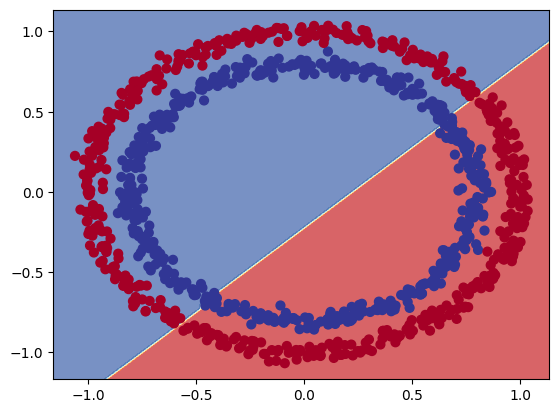

In [21]:
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [22]:
tf.random.set_seed(42)

X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [23]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(X_reg_train, axis=1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 347.8781 - mae: 347.8781
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 228.0460 - mae: 228.0460
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 111.0680 - mae: 111.0680
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 52.1386 - mae: 52.1386
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 79.7623 - mae: 79.7623
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 63.3471 - mae: 63.3471
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 43.0408 - mae: 43.0408
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 50.4572 - mae: 50.4572
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 41.9871 - mae: 41.9871
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 45.2457 - mae: 45.2457
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 4ms/step


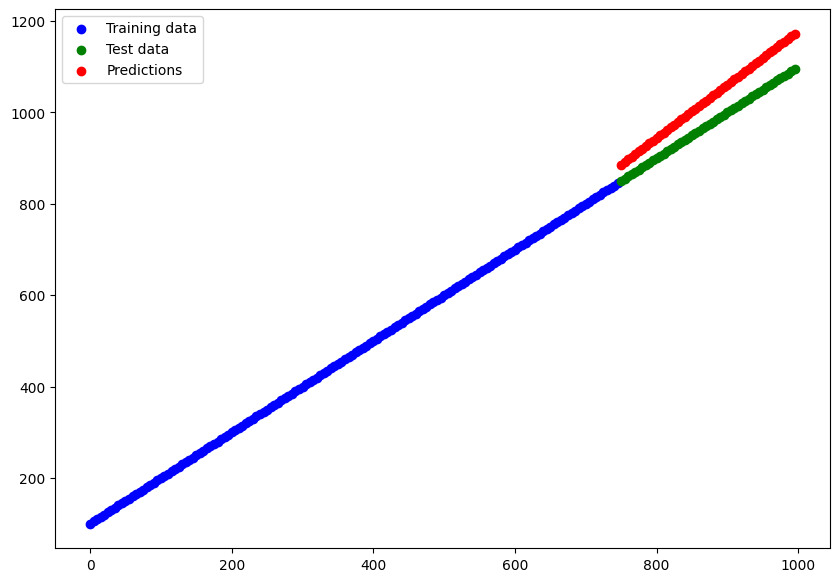

In [24]:
y_reg_preds = model_3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [25]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.4863 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4713 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4603 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3934 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3839 - accuracy: 0.4810
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4166 - accuracy: 0.4800
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3759 - accuracy: 0.4800
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.3581 - accuracy: 0.4800
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3450 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2658 - accuracy: 0.4790
Epoch 11/

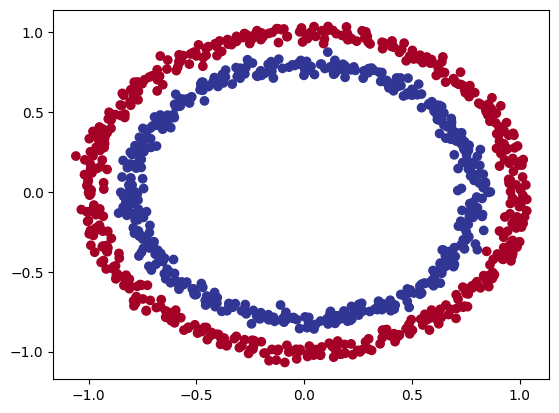

In [26]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
doing binary classification


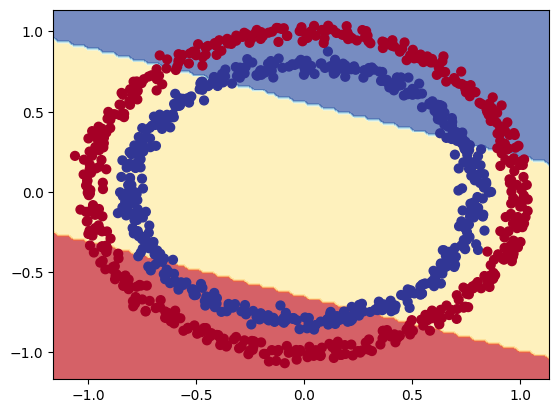

In [27]:
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

In [28]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="relu")
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.0353 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0369 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0251 - accuracy: 0.4810
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0037 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0078 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9895 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9977 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9725 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9493 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.9045 - accuracy: 0.4840
Epoch 11/

In [29]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 0.7129 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7031 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6982 - accuracy: 0.4890
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.4780
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.4880
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5040
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classification


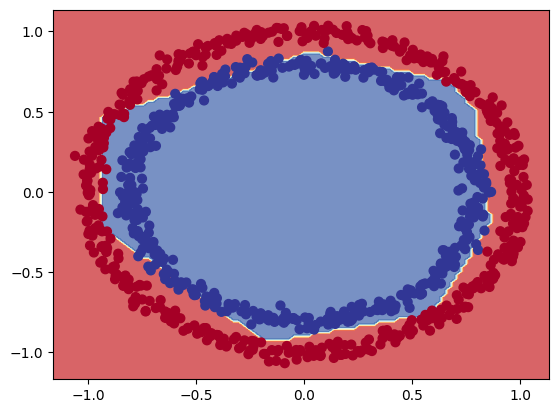

In [30]:
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [31]:
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

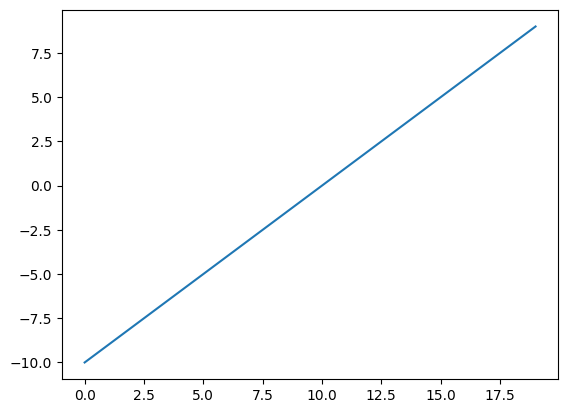

In [32]:
plt.plot(A)

## Evaluating and Improving our Classification Model

In [33]:
len(X), len(y)

(1000, 1000)

In [34]:
X_train = X[:800]
y_train = y[:800]

X_test = X[800:]
y_test = y[800:]

In [35]:
len(X_train)

800

In [36]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=["accuracy"])

history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 3ms/step - loss: 0.6883 - accuracy: 0.5138
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5638
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.5225
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6760 - accuracy: 0.5562
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6709 - accuracy: 0.5562
Epoch 6/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6619 - accuracy: 0.5437
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6479 - accuracy: 0.6300
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6363 - accuracy: 0.6200
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6222 - accuracy: 0.6538
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6077 - accuracy: 0.6488
Epoch 11/25
25/25 [

In [37]:
model_8.evaluate(X_train, y_train)

25/25 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8550


[0.37324661016464233, 0.8550000190734863]

In [38]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.3802 - accuracy: 0.8500


[0.3802167475223541, 0.8500000238418579]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


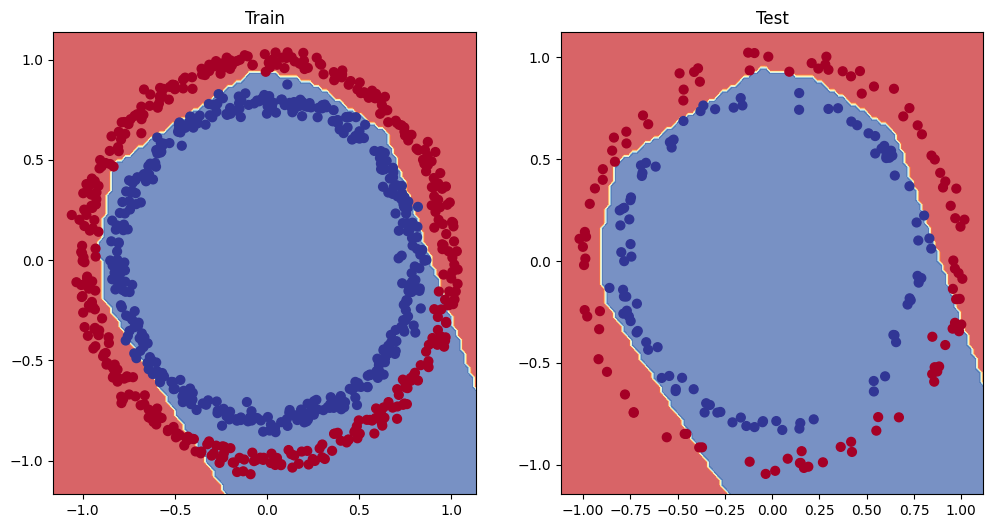

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

## Plot the loss (or training) curves

In [40]:
history.history

{'loss': [0.6883490681648254,
  0.6833945512771606,
  0.6804602742195129,
  0.6759867668151855,
  0.6709339618682861,
  0.6619008779525757,
  0.6478796601295471,
  0.6362974643707275,
  0.622178852558136,
  0.6077404022216797,
  0.5903704762458801,
  0.5784956812858582,
  0.572723388671875,
  0.5595629811286926,
  0.5453444123268127,
  0.5321184396743774,
  0.5004233717918396,
  0.4609256386756897,
  0.4447491765022278,
  0.4375498294830322,
  0.4176037907600403,
  0.4093609154224396,
  0.3986595571041107,
  0.38807225227355957,
  0.38005608320236206],
 'accuracy': [0.5137500166893005,
  0.5637500286102295,
  0.5224999785423279,
  0.5562499761581421,
  0.5562499761581421,
  0.543749988079071,
  0.6299999952316284,
  0.6200000047683716,
  0.6537500023841858,
  0.6487500071525574,
  0.6625000238418579,
  0.6875,
  0.6850000023841858,
  0.7012500166893005,
  0.7137500047683716,
  0.7212499976158142,
  0.7737500071525574,
  0.8062499761581421,
  0.8075000047683716,
  0.8100000023841858,
  

In [41]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.688349,0.51375
1,0.683395,0.56375
2,0.680460,0.52250
3,0.675987,0.55625
4,0.670934,0.55625
5,0.661901,0.54375
6,0.647880,0.63000
7,0.636297,0.62000
8,0.622179,0.65375
9,0.607740,0.64875


Text(0.5, 1.0, 'Model_8 loss cureves')

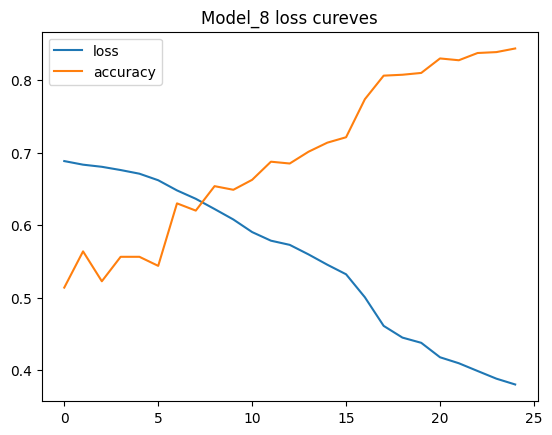

In [42]:
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss cureves")

## Finding the best learning rate

In [43]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 2s 4ms/step - loss: 0.6910 - accuracy: 0.4963 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5088 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5088 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.5113 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5088 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5100 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5088 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5088 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

In [46]:
pd.DataFrame(history_9.history)

,loss,accuracy,lr
0,0.691020,0.49625,0.000100
1,0.690980,0.50875,0.000112
2,0.690936,0.50875,0.000126
3,0.690895,0.51125,0.000141
4,0.690844,0.50875,0.000158
...,...,...,...
95,0.777813,0.46375,5.623413
96,0.803913,0.50125,6.309574
97,0.960559,0.49625,7.079458
98,0.946705,0.49125,7.943282


In [48]:
pd.DataFrame(history.history)

,loss,accuracy
0,0.688349,0.51375
1,0.683395,0.56375
2,0.680460,0.52250
3,0.675987,0.55625
4,0.670934,0.55625
5,0.661901,0.54375
6,0.647880,0.63000
7,0.636297,0.62000
8,0.622179,0.65375
9,0.607740,0.64875


<Axes: xlabel='epochs'>

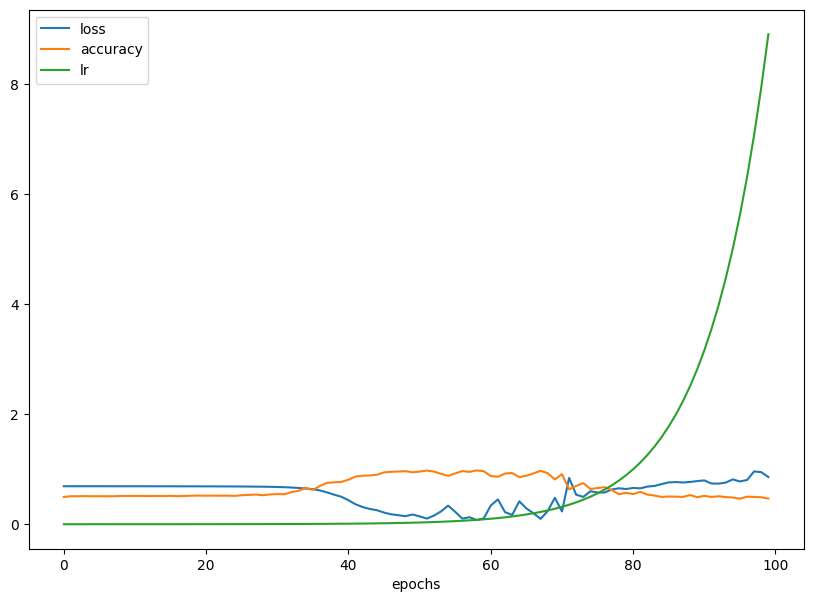

In [44]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0, 0.5, 'Loss')

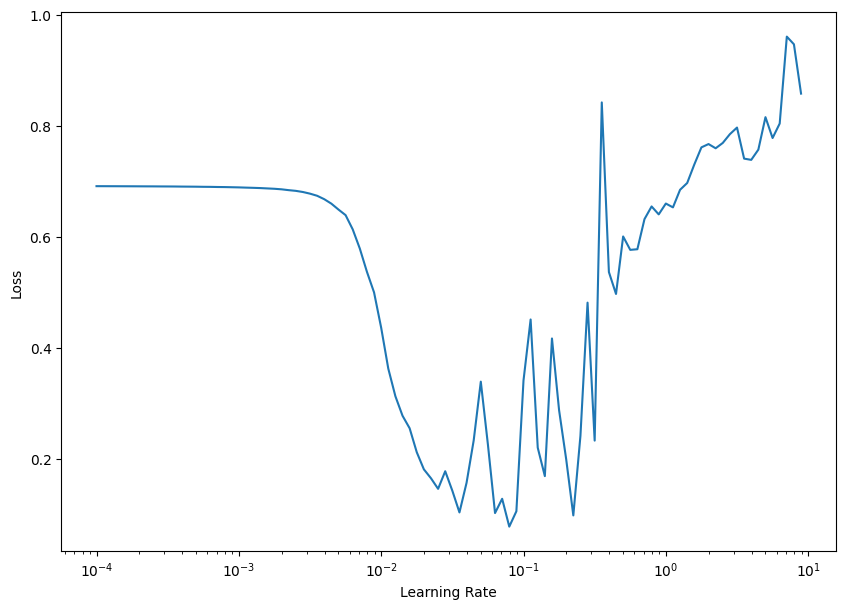

In [49]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [50]:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [53]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                 metrics=["accuracy"])

history_10 = model_10.fit(X_train, y_train, epochs=25, verbose=1)

Epoch 1/25
25/25 [==============================] - 2s 3ms/step - loss: 0.6983 - accuracy: 0.4600
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6849 - accuracy: 0.5362
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6731 - accuracy: 0.5913
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6537 - accuracy: 0.6150
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6117 - accuracy: 0.7287
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5495 - accuracy: 0.8250
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4789 - accuracy: 0.8925
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4055 - accuracy: 0.9175
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3262 - accuracy: 0.9600
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2515 - accuracy: 0.9862
Epoch 11/25
25/25 [

In [54]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.0466 - accuracy: 0.9950


[0.046597920358181, 0.9950000047683716]

In [55]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.3802 - accuracy: 0.8500


[0.3802167475223541, 0.8500000238418579]

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 2ms/step
doing binary classification


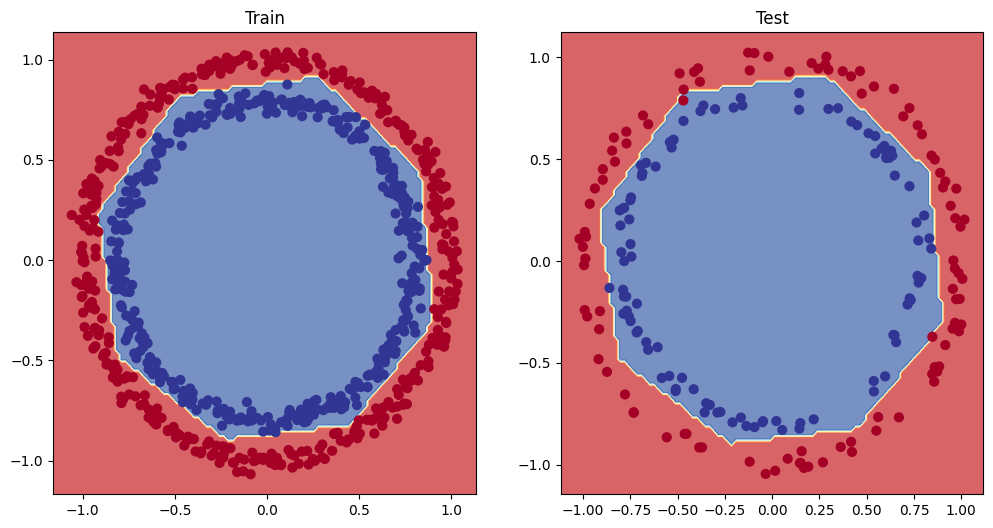

In [56]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()